<a href="https://colab.research.google.com/github/sundarp17/Hacker-Earth/blob/main/employees_burning_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_train = pd.read_csv(r'/content/train.csv')
df_train.head(20)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3.0,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2.0,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3.0,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3.0,6.0,NaN,0.67


In [ ]:
df_train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


missing values


In [ ]:
(df_train.isnull().sum()*100)/df_train.isnull().count()

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     6.070330
Mental Fatigue Score    9.305495
Burn Rate               4.940659
dtype: float64

In [ ]:
df_train['Burn Rate'].isnull().sum()

1124

In [ ]:
df_train=df_train.interpolate(method='from_derivatives')
(df_train.isnull().sum()*100)/df_train.isnull().count()

Employee ID             0.0
Date of Joining         0.0
Gender                  0.0
Company Type            0.0
WFH Setup Available     0.0
Designation             0.0
Resource Allocation     0.0
Mental Fatigue Score    0.0
Burn Rate               0.0
dtype: float64

In [ ]:
df_train.loc[df_train['Gender']=='Female',"Gender"]=0
df_train.loc[df_train['Gender']=='Male',"Gender"]=1
df_train.loc[df_train['Company Type']=='Service',"Company Type"]=0
df_train.loc[df_train['Company Type']=='Product',"Company Type"]=1
df_train.loc[df_train['WFH Setup Available']=='No',"WFH Setup Available"]=0
df_train.loc[df_train['WFH Setup Available']=='Yes',"WFH Setup Available"]=1

df_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,0,0,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,1,0,1,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,0,1,1,2.0,1.5,5.8,0.49
3,fffe32003400380032003900,2008-11-03,1,0,1,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,0,0,0,3.0,7.0,6.9,0.52


Outliers

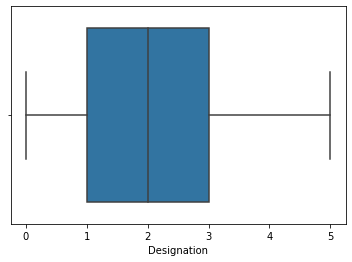

In [ ]:
import seaborn as sns
sns.boxplot(x=df_train['Designation'])

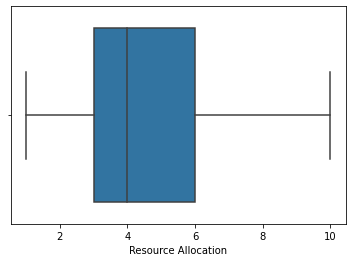

In [ ]:
sns.boxplot(x=df_train['Resource Allocation'])

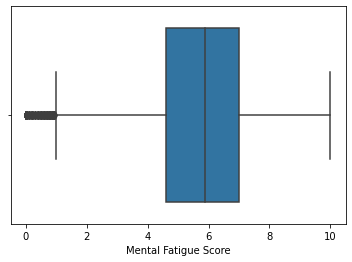

In [ ]:
sns.boxplot(x=df_train['Mental Fatigue Score'])

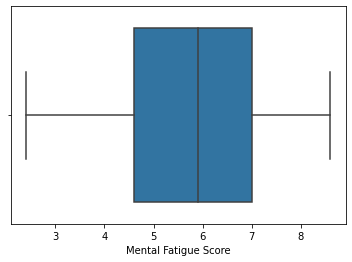

In [ ]:
from scipy.stats.mstats import winsorize
df_train['Mental Fatigue Score']=winsorize(df_train['Mental Fatigue Score'],limits=[0.05,0.05])
sns.boxplot(x=df_train['Mental Fatigue Score'])

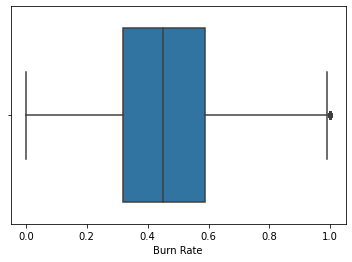

In [ ]:
sns.boxplot(x=df_train['Burn Rate'])

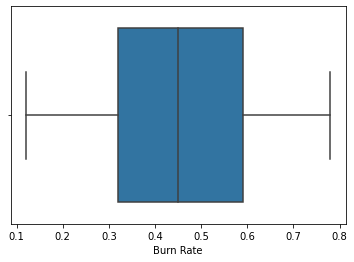

In [ ]:
df_train['Burn Rate']=winsorize(df_train['Burn Rate'],limits=[0.05,0.05])
sns.boxplot(x=df_train['Burn Rate'])

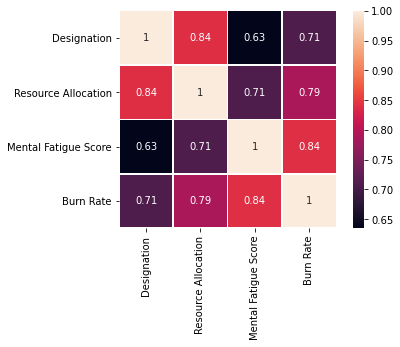

In [ ]:
sns.heatmap(df_train.corr(), square=True, annot=True, linewidths=.5)

In [ ]:
from sklearn import linear_model
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

X=df_train[['Gender','Company Type','WFH Setup Available','Mental Fatigue Score','Resource Allocation','Designation']]
y=df_train[['Burn Rate']]

scaler = StandardScaler()

model = linear_model.LinearRegression(normalize=True)

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

print(x_train.shape)
print(x_test.shape)
train_scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(x_test)

model.fit(train_scaled, y_train)
pred=model.predict(test_scaled)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
from math import sqrt
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))
metrics.r2_score(y_test,pred)

(15925, 6)
(6825, 6)
mse =  0.006821744820972123  & mae =  0.058135080394702186  & rmse =  0.08259385461989362


0.7891760815635336

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

tree_model.fit(train_scaled, y_train)
rf_model.fit(train_scaled, y_train)

tree_mse = mean_squared_error(y_test, tree_model.predict(test_scaled))
tree_mae = mean_absolute_error(y_test, tree_model.predict(test_scaled))
rf_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse))

print("Decision tree= ",metrics.r2_score(y_test,tree_model.predict(test_scaled)))
print("Random Forest= ",metrics.r2_score(y_test,rf_model.predict(test_scaled)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Decision Tree training mse =  0.00835083330462429  & mae =  0.062462494198642846  & rmse =  0.09138289393876892
Random Forest training mse =  0.006962088495279748  & mae =  0.0585968976062554  & rmse =  0.08343913048012754
Decision tree=  0.7419200738675897
Random Forest=  0.7848388036204563


In [ ]:
df_test = pd.read_csv(r'/content/test.csv')
df_test.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [ ]:
df_test.loc[df_test['Gender']=='Female',"Gender"]=0
df_test.loc[df_test['Gender']=='Male',"Gender"]=1
df_test.loc[df_test['Company Type']=='Service',"Company Type"]=0
df_test.loc[df_test['Company Type']=='Product',"Company Type"]=1
df_test.loc[df_test['WFH Setup Available']=='No',"WFH Setup Available"]=0
df_test.loc[df_test['WFH Setup Available']=='Yes',"WFH Setup Available"]=1
df_test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,0,0,0,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,0,1,1,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,1,1,1,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,0,0,0,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,0,1,0,2.0,5.0,6.4


In [ ]:
xvalues_test=df_test[['Gender','Company Type','WFH Setup Available','Mental Fatigue Score','Resource Allocation','Designation']]
df_test['Burn Rate']=tree_model.predict(xvalues_test)
print(df_test['Burn Rate'].head(10))
#submission
submission=df_test[['Employee ID','Burn Rate']]
print(submission.head())
sub= pd.DataFrame(submission).to_csv('submission.csv', header=True, index=None)

0    0.78
1    0.78
2    0.78
3    0.78
4    0.78
5    0.78
6    0.78
7    0.78
8    0.78
9    0.78
Name: Burn Rate, dtype: float64
                Employee ID  Burn Rate
0  fffe31003300390039003000       0.78
1  fffe31003300310037003800       0.78
2  fffe33003400380035003900       0.78
3      fffe3100370039003200       0.78
4  fffe32003600390036003700       0.78


In [ ]:
submission.describe()

,Burn Rate
count,12250.000000
mean,0.771118
std,0.053445
min,0.190000
25%,0.780000
50%,0.780000
75%,0.780000
max,0.780000
